<a href="https://colab.research.google.com/github/sisco1113/linear-regression-deep-learning-AI-algorithm/blob/main/Linear_Regression_(Deep_Learning_AI_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers, utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Boston housing features
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston_data = pd.read_csv("boston_housing.csv", names=columns)


In [ ]:
# show dimension, datatype, and first 5 rows of boston_data.
# use shape, dtypes, head
print("Dimension:", boston_data.shape)
print("Datatype:\n", boston_data.dtypes)
print("First 5 rows:\n", boston_data.head)

Dimension: (506, 14)
Datatype:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object
First 5 rows:
 <bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875

In [ ]:
# show correlation between attributes.
# use corr with pearson
print("Correlation between attributes:", boston_data.corr(method='pearson'))


Correlation between attributes:              crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515

In [ ]:
# for each attribute, show mean, count, std, min, max, etc
# use describe
print(boston_data.describe())


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

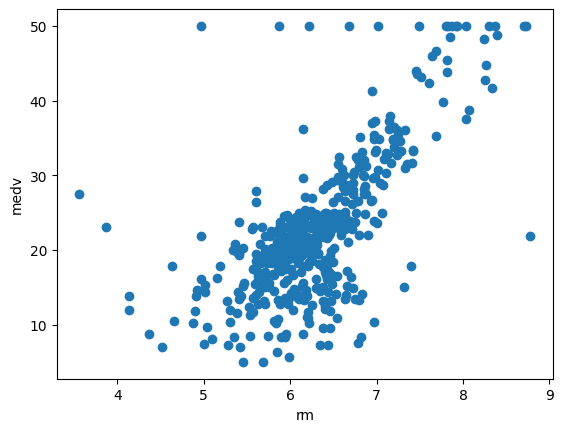

In [ ]:
# Visualization
# We want to show the relationship between ‘rm’ attribute and ‘medv’(target) attribute

# define x_val and y_val from boston_data
x_val= boston_data['rm']
y_val= boston_data['medv']

plt.scatter(x_val, y_val)
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()


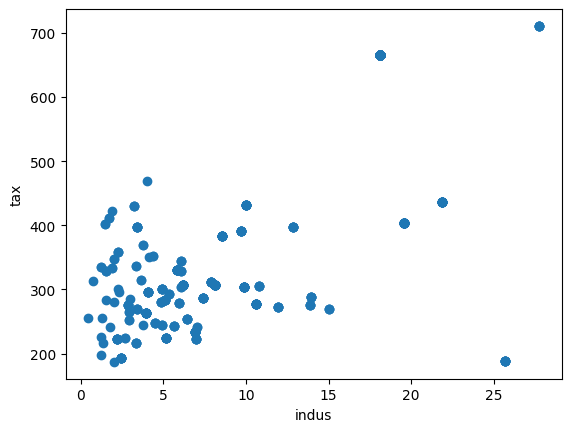

In [ ]:
# choose another attribute and draw similar graph as above

x_val= boston_data['indus']
y_val= boston_data['tax']

plt.scatter(x_val, y_val)
plt.xlabel('indus')
plt.ylabel('tax')
plt.show()


In [ ]:
# With .pop() command, the associated columns are extracted.
# select input attributes wo target attributes
Y = boston_data.pop('medv')
# select target attribute
X = boston_data

# split X, Y into X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#  Show that split is correctly done
# you can show the shape of each data & first 5 rows of each data
print("X_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\nY_train:\n", Y_train.head())
print("\nY_test:\n", Y_test.head())

X_train:
          crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
478  10.23300   0.0  18.10     0  0.614  6.185  96.7  2.1705   24  666   
26    0.67191   0.0   8.14     0  0.538  5.813  90.3  4.6820    4  307   
7     0.14455  12.5   7.87     0  0.524  6.172  96.1  5.9505    5  311   
492   0.11132   0.0  27.74     0  0.609  5.983  83.5  2.1099    4  711   
108   0.12802   0.0   8.56     0  0.520  6.474  97.1  2.4329    5  384   

     ptratio       b  lstat  
478     20.2  379.70  18.03  
26      21.0  376.88  14.81  
7       15.2  396.90  19.15  
492     20.1  396.90  13.35  
108     20.9  395.24  12.27  

X_test:
         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
173  0.09178   0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296   
274  0.05644  40.0   6.41     1  0.447  6.758  32.9  4.0776    4  254   
491  0.10574   0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711   
72   0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    

In [ ]:
# MSE linear regression model in Keras
# We don't specify anything for activation -> no activation is applied
# (ie. "linear" activation: a(x) = x) model = Sequential()
model = Sequential()
model.add(Dense(1, input_dim=13))

# you can change optimizer or loss function, if you want
# use adam as an optimizer and mse(mean squared error) as the error function
# fill the red blanks below (2 pts) model.compile(optimizer='OOO', loss='OOO')
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# train linear regression model
# you can change the values of batch_size and epochs
model.fit(X_train, Y_train, batch_size=16, epochs=10, validation_data=(X_test, Y_test)) # show the structure of network
model.summary()

# show the coefficients of linear regression print(model.layers[0].get_weights()[0]) print(model.layers[0].get_weights()[1])
print(model.layers[0].get_weights()[0])
print(model.layers[0].get_weights()[1])
# show the error value
# use evaluate, etc
model.evaluate(X_train, Y_train, batch_size=16)

Epoch 1/10
22/22 [==============================] - 1s 13ms/step - loss: 78287.5469 - val_loss: 69732.1953
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 67585.7734 - val_loss: 59905.2812
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 57950.9023 - val_loss: 51140.2344
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 49346.8867 - val_loss: 43374.7656
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 41865.8555 - val_loss: 36539.1016
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 35170.2148 - val_loss: 30636.7969
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 29484.5488 - val_loss: 25460.3945
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 24517.2383 - val_loss: 21127.2148
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 20304.3281 - val_loss: 17423.3887
Epoch 10/10
22/22 [==========================

14983.48828125

6/6 [==============================] - 0s 3ms/step
prediction:  [-101.43687   -95.466934 -136.05527  -113.65956  -120.721504 -103.66337
  -94.55867  -100.0139   -124.71111  -108.92111   -88.44274   -92.53453
  -21.781942 -111.5236    -95.543274 -124.64959   -64.56953  -110.444016
  -89.72506  -120.66191   -99.97982   -95.45845   -81.98572   -94.98523
 -102.47368  -110.3033   -119.31342   -16.576017  -88.59181  -111.045044
  -99.97157  -103.09562  -118.1339   -121.1332   -105.07647   -67.631
  -97.408905  -96.0564    -93.61414  -109.79885  -109.221855  -84.02963
  -78.9241   -111.67479  -102.50239  -121.86265   -82.52964  -111.59144
 -125.9514   -106.294334  -97.00386   -96.357216  -93.1195   -110.52791
 -101.03833  -132.31104  -121.76798   -84.073204 -101.981804  -92.99864
  -94.57367   -80.27298  -110.47553   -79.43528  -103.367325  -86.64564
 -119.8794   -102.71851   -89.94163   -21.05487  -101.627014 -128.0152
  -77.14078   -89.75798  -114.49999  -108.13651  -104.79824   -79.09553
 

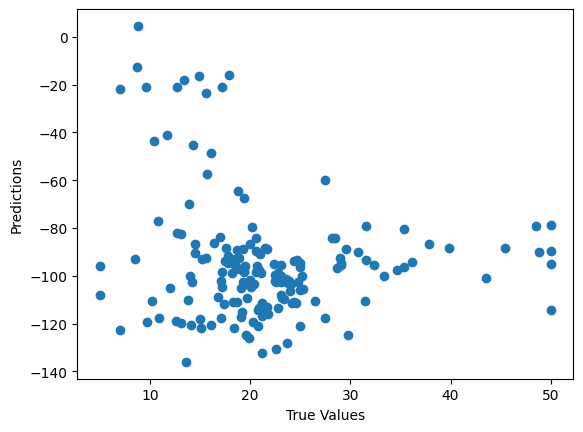

1/1 [==============================] - 0s 33ms/step

Output: [[-101.43687]]


In [ ]:
Y_predictions = model.predict(X_test)
print('prediction: ', Y_predictions.flatten())
print('Y_test: ', Y_test)

# show the replationalship between label and predictions
plt.scatter(Y_test, Y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Using a certain input data, compute the linear regression output
# use predict
input_data = np.array([X_test.iloc[0]])
output = model.predict(input_data)
print("\nOutput:", output)